In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [6]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

In [8]:
train.describe()

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1968.000000,3000.000000
mean,53.06800,168.585687,72.486680,233.910523,146.144333,95.504000,126.467720,0.933367,8.716972,0.482130
std,20.67207,9.351876,13.167222,24.333434,15.845310,9.895283,18.536844,0.444783,1.628944,0.288252
min,17.00000,141.130000,36.320000,148.810000,97.000000,60.000000,70.050000,-0.220000,4.000000,0.000000
25%,35.00000,161.800000,63.035000,216.927500,135.000000,89.000000,113.912500,0.560000,8.000000,0.230000
50%,53.00000,168.115000,71.240000,234.255000,146.000000,95.000000,126.555000,0.940000,9.000000,0.480000
75%,72.00000,175.352500,81.832500,250.377500,158.000000,102.000000,139.180000,1.300000,10.000000,0.730000
max,89.00000,195.280000,120.880000,313.350000,191.000000,124.000000,185.740000,2.000000,16.000000,1.000000


In [9]:
train.isnull().sum()

ID                             0
gender                         0
age                            0
height                         0
weight                         0
cholesterol                    0
systolic_blood_pressure        0
diastolic_blood_pressure       0
glucose                        0
bone_density                   0
activity                       0
smoke_status                   0
medical_history             1289
family_medical_history      1486
sleep_pattern                  0
edu_level                    607
mean_working                1032
stress_score                   0
dtype: int64

결측치 시각화

<Axes: >

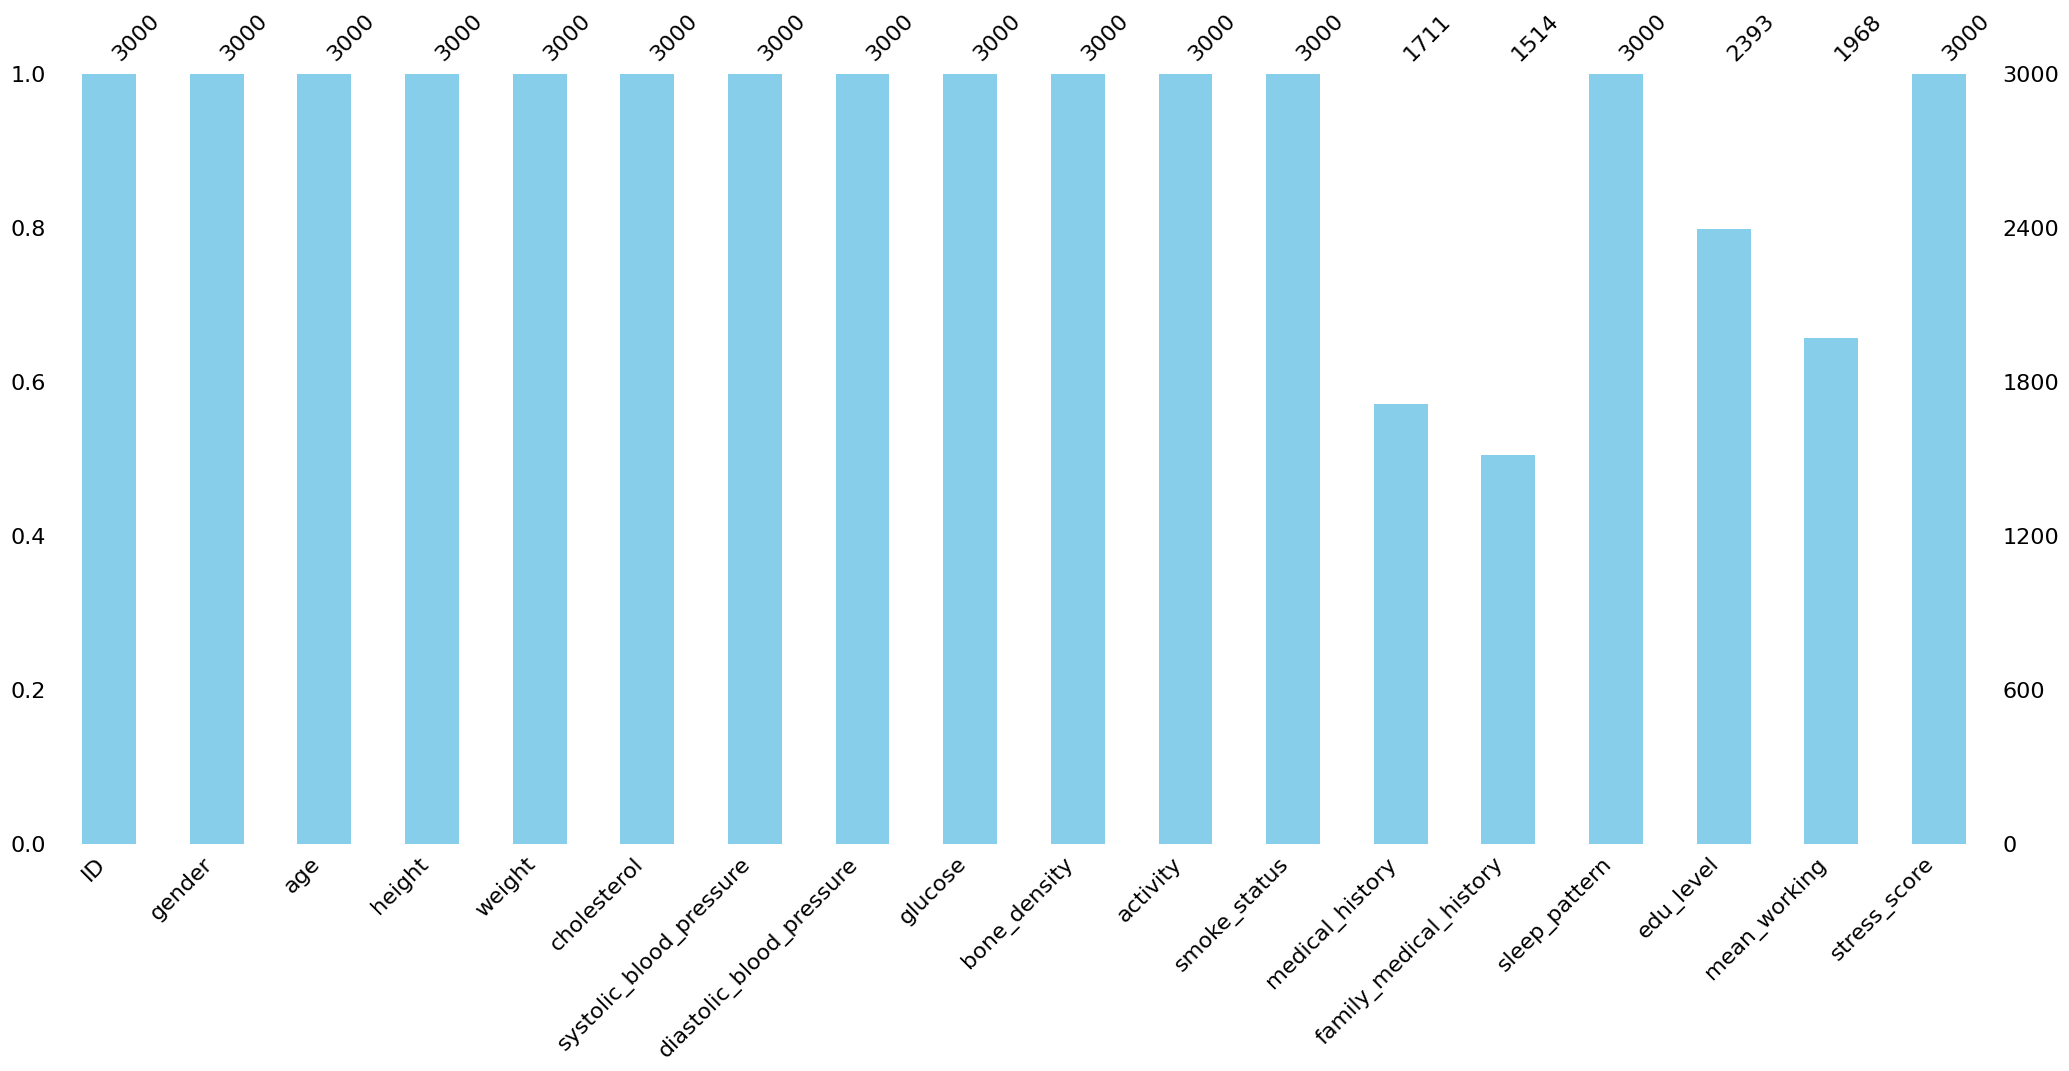

In [10]:
import missingno as msno
msno.bar(train, color='skyblue')

결측치 비율 확인

In [11]:
(train.isnull().mean() * 100).sort_values(ascending=False)

family_medical_history      49.533333
medical_history             42.966667
mean_working                34.400000
edu_level                   20.233333
gender                       0.000000
ID                           0.000000
age                          0.000000
height                       0.000000
weight                       0.000000
cholesterol                  0.000000
bone_density                 0.000000
glucose                      0.000000
diastolic_blood_pressure     0.000000
systolic_blood_pressure      0.000000
activity                     0.000000
smoke_status                 0.000000
sleep_pattern                0.000000
stress_score                 0.000000
dtype: float64

타깃 변수(stress_score) 분포 확인

Text(0.5, 1.0, 'Stress Score Distribution')

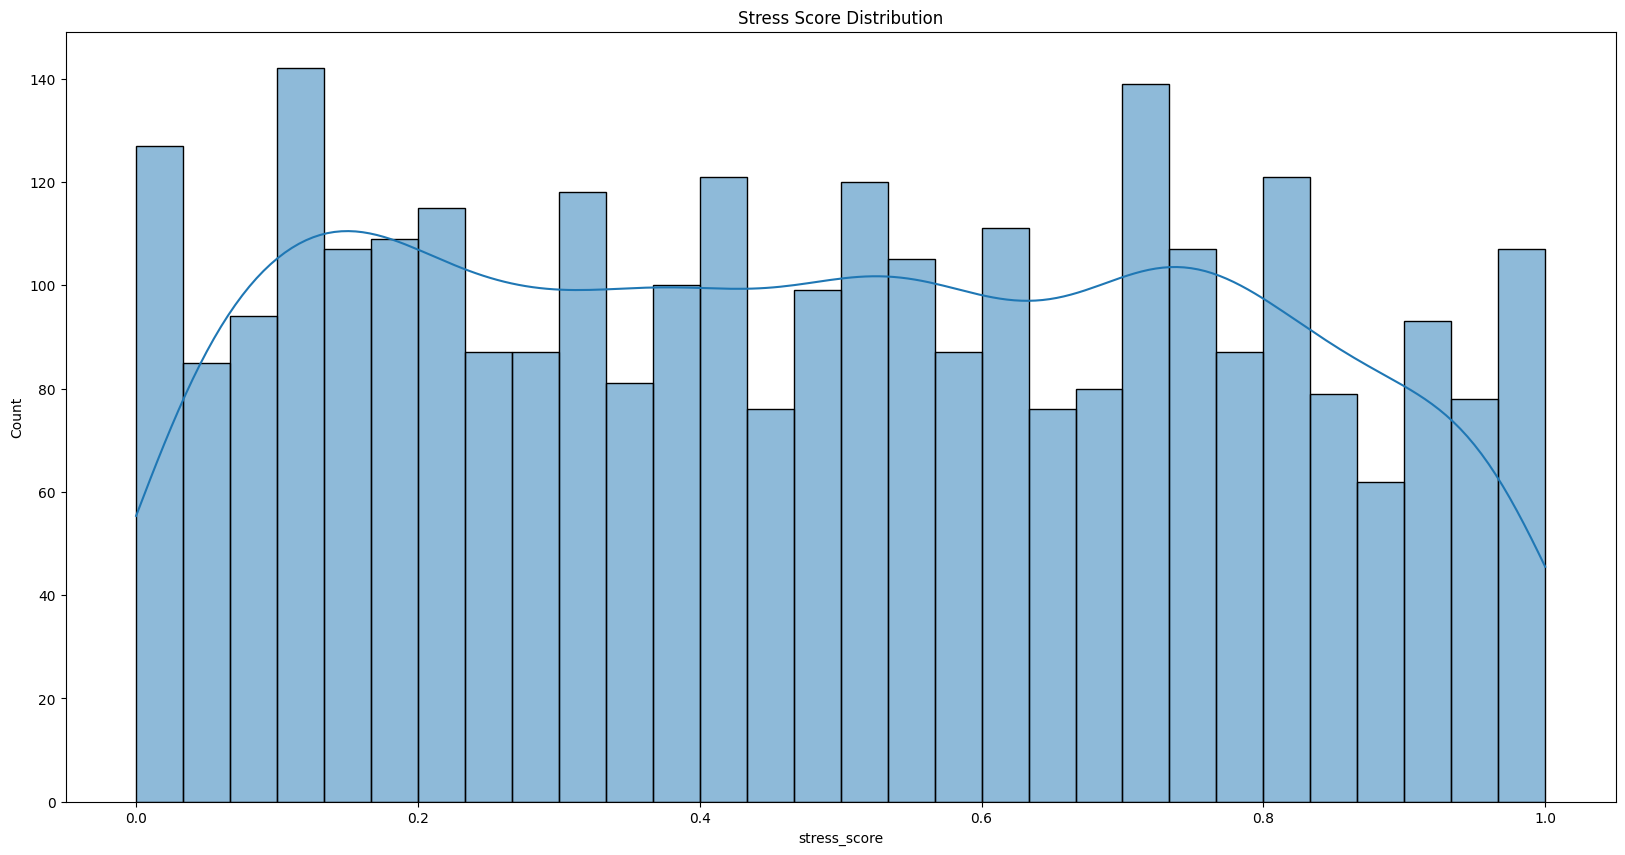

In [12]:
plt.figure(figsize=(20, 10))
sns.histplot(train['stress_score'], kde=True, bins=30)
plt.title("Stress Score Distribution")

수치형 변수와 스트레스 점수 간의 상관관계

Text(0.5, 1.0, 'Correlation Matrix with Stress Score')

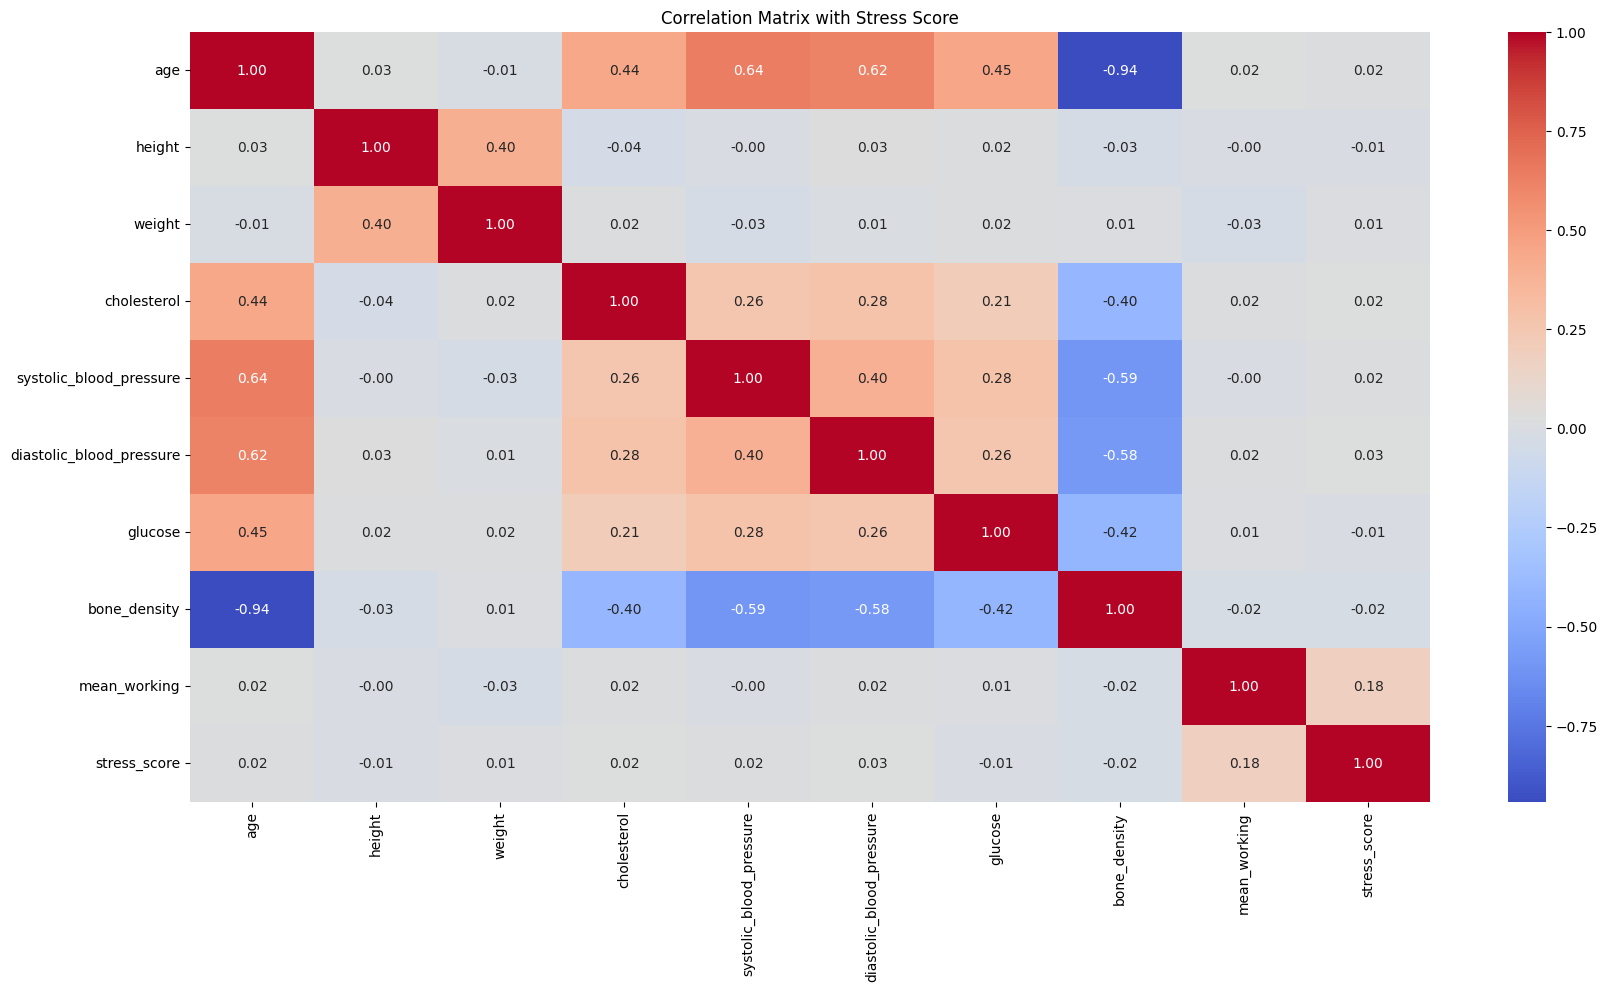

In [13]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Stress Score")

Text(0.5, 1.05, 'Stress Score by numeric')

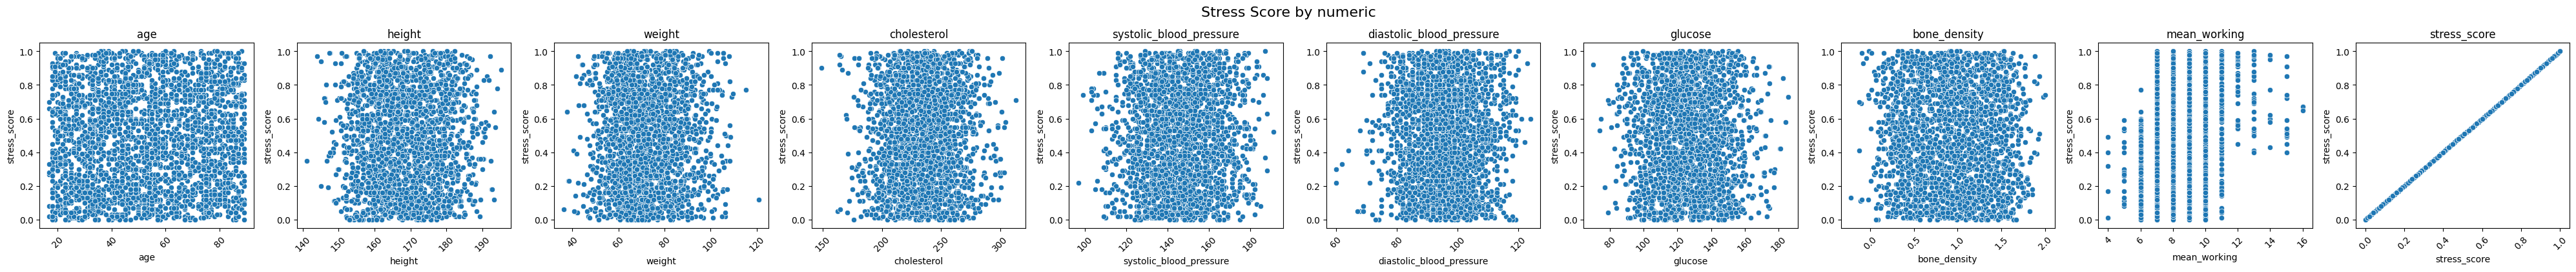

In [14]:
num_cols= [i for i in train.select_dtypes(include=['number'])]

plt.figure(figsize=(len(num_cols)*4, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.scatterplot(data=train, x=col, y='stress_score')
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Stress Score by numeric', fontsize=16, y=1.05)

범주형 변수와 스트레스 점수 관계

Text(0.5, 1.05, 'Stress Score by Category')

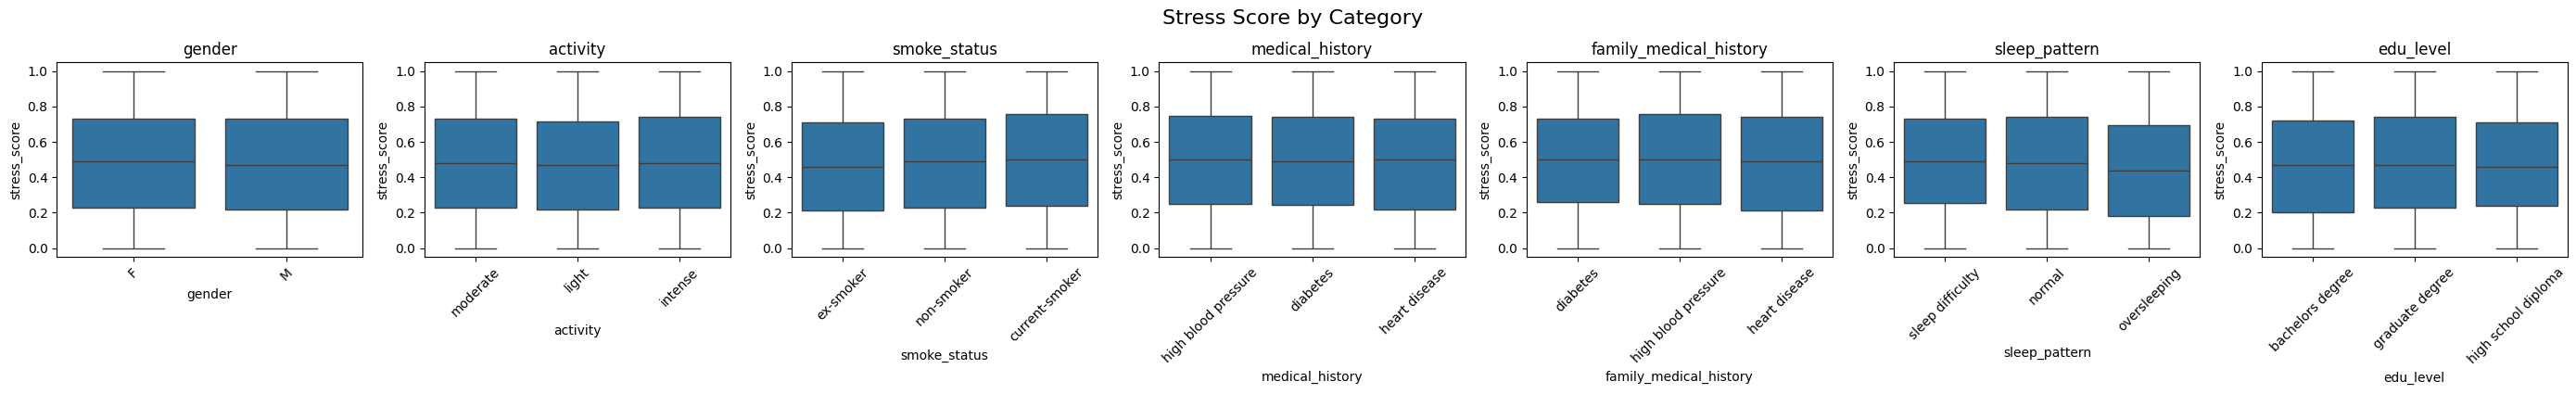

In [15]:
cat_cols = [i for i in train.select_dtypes(include=['object']) if i != 'ID']

plt.figure(figsize=(len(cat_cols)*4, 4))

for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i+1)
    sns.boxplot(data=train, x=col, y='stress_score')
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Stress Score by Category', fontsize=16, y=1.05)

In [16]:
cat_cols

['gender',
 'activity',
 'smoke_status',
 'medical_history',
 'family_medical_history',
 'sleep_pattern',
 'edu_level']

In [17]:
num_cols

['age',
 'height',
 'weight',
 'cholesterol',
 'systolic_blood_pressure',
 'diastolic_blood_pressure',
 'glucose',
 'bone_density',
 'mean_working',
 'stress_score']

In [18]:
train['diabetes'] = (train['glucose'] >= 126).astype(int)
train['hypertension'] = ((train['systolic_blood_pressure'] >= 140) | (train['diastolic_blood_pressure'] >= 90)).astype(int)
train['hyperlipidemia'] = (train['cholesterol'] >= 240).astype(int)
train['bmi'] = (train['weight'] / (train['height']*0.01)**2)
train['obesity'] = (train['bmi'] >= 30).astype(int)



Text(0.5, 1.0, 'Stress Score of Dieases')

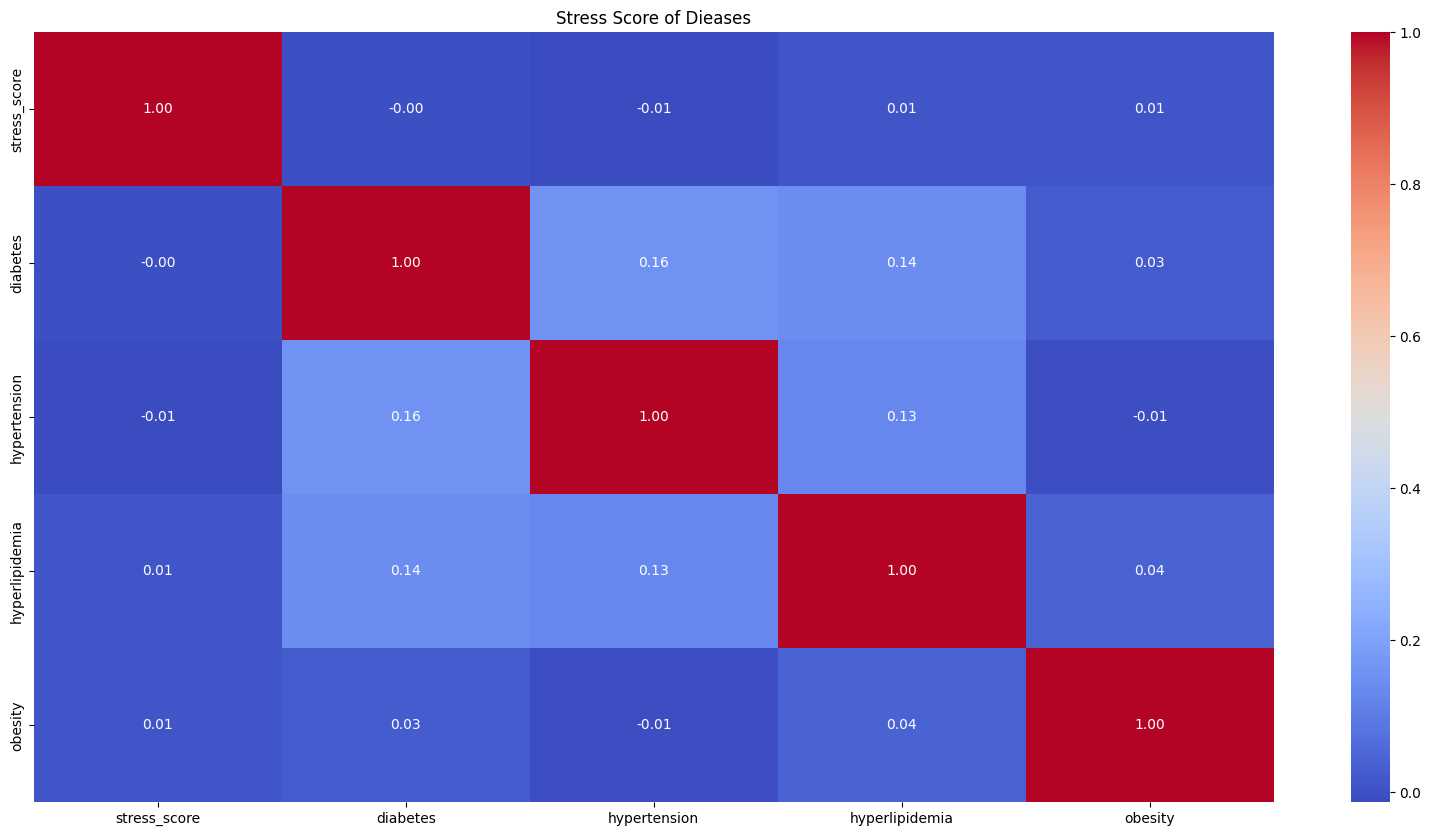

In [19]:
cols = ['stress_score', 'diabetes', 'hypertension', 'hyperlipidemia', 'obesity']
corr = train[cols].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Stress Score of Dieases")

In [20]:
import statsmodels.api as sm

X = train[['diabetes', 'hypertension', 'hyperlipidemia', 'obesity']]
y = train['stress_score']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           stress_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2584
Date:                Sat, 19 Jul 2025   Prob (F-statistic):              0.905
Time:                        01:11:24   Log-Likelihood:                -524.04
No. Observations:                3000   AIC:                             1058.
Df Residuals:                    2995   BIC:                             1088.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4891      0.015     33.

Text(0.5, 1.0, 'Stress Score vs Number of Diseases')

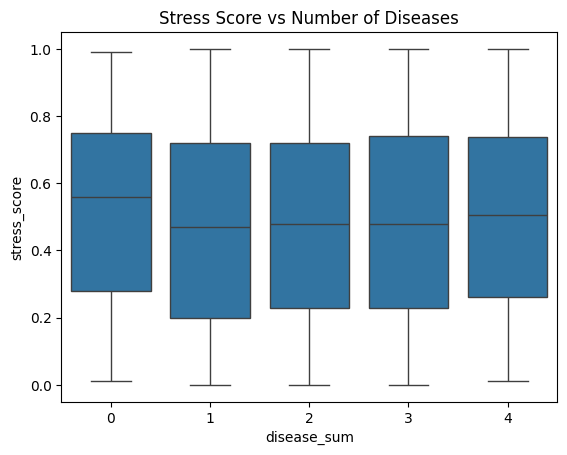

In [21]:
disease_cols = ['diabetes', 'hypertension', 'hyperlipidemia', 'obesity']
train['disease_sum'] = train[disease_cols].sum(axis=1)

plt.Figure(figsize=(8, 5))
sns.boxplot(data=train, x='disease_sum', y='stress_score')
plt.title("Stress Score vs Number of Diseases")

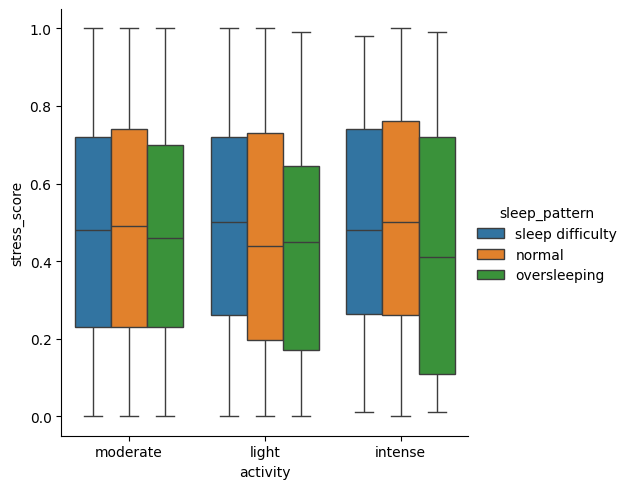

In [22]:
sns.catplot(data=train, x='activity', y='stress_score', hue='sleep_pattern', kind='box')

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train.drop(columns=['stress_score', 'ID'])
y = train['stress_score']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 0.24363621069126815


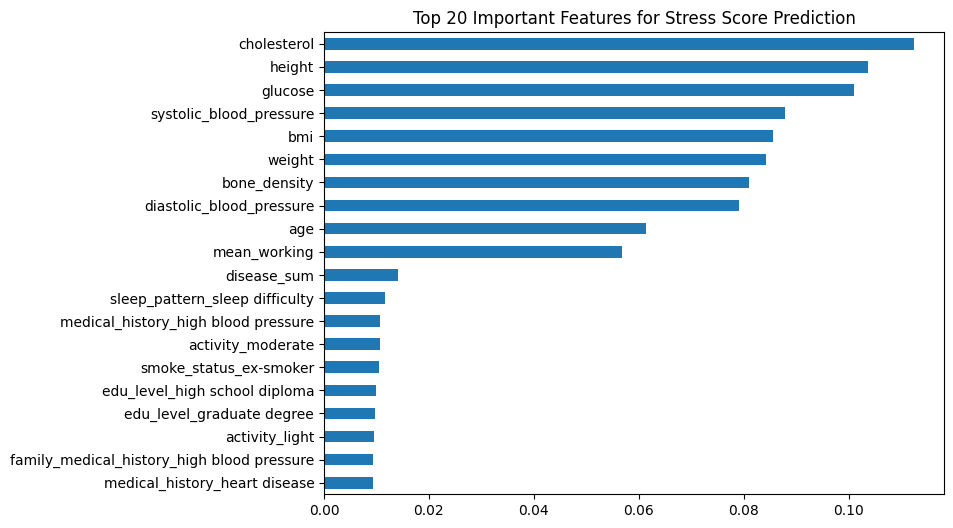

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
feat_names = X.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp[:20].plot(kind='barh', figsize=(8, 6))
plt.title("Top 20 Important Features for Stress Score Prediction")
plt.gca().invert_yaxis()